In [15]:
import pytesseract
import cv2
import matplotlib.pyplot as plt

In [16]:
def display_image(image):
    plt.figure(figsize=(30, 30))
    plt.subplot(1, 3, 3)
    plt.imshow(image, cmap="gray")
    plt.title("image")
    plt.show()

In [17]:
image = cv2.imread("data/sample_mgh.JPG")
im_h, im_w, im_d = image.shape
base_image = image.copy()

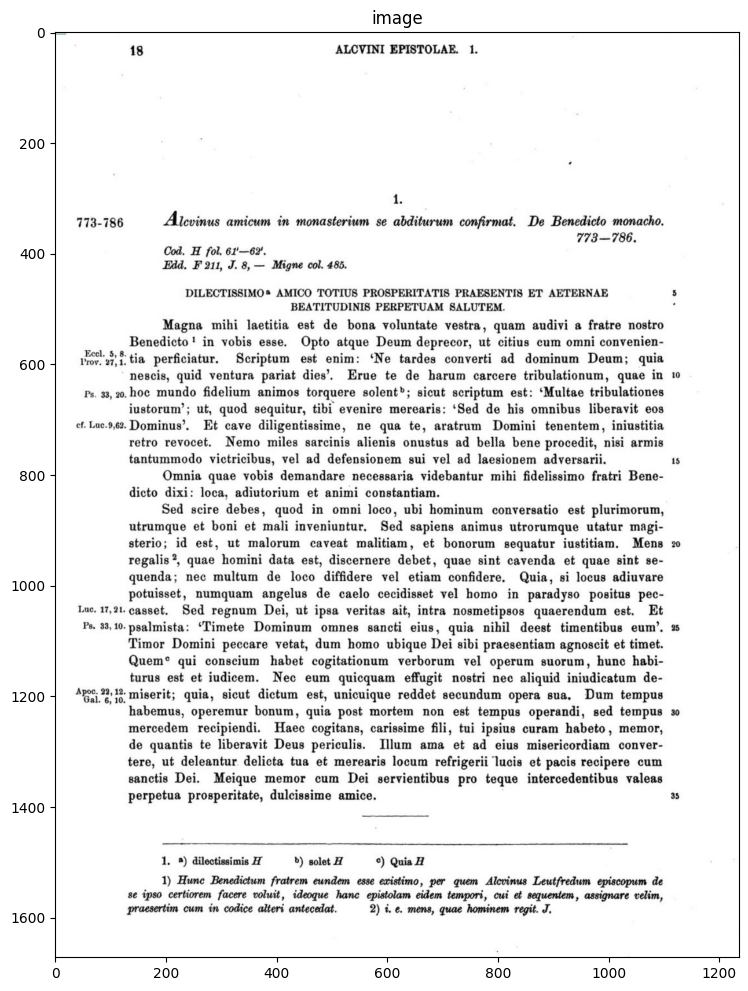

In [18]:
display_image(image)

In [19]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (7,7), 0)
thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

In [20]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (50, 10))
dilate = cv2.dilate(thresh, kernel, iterations=1)

In [21]:
cv2.imwrite("temp/dilated_sample.png", dilate)

True

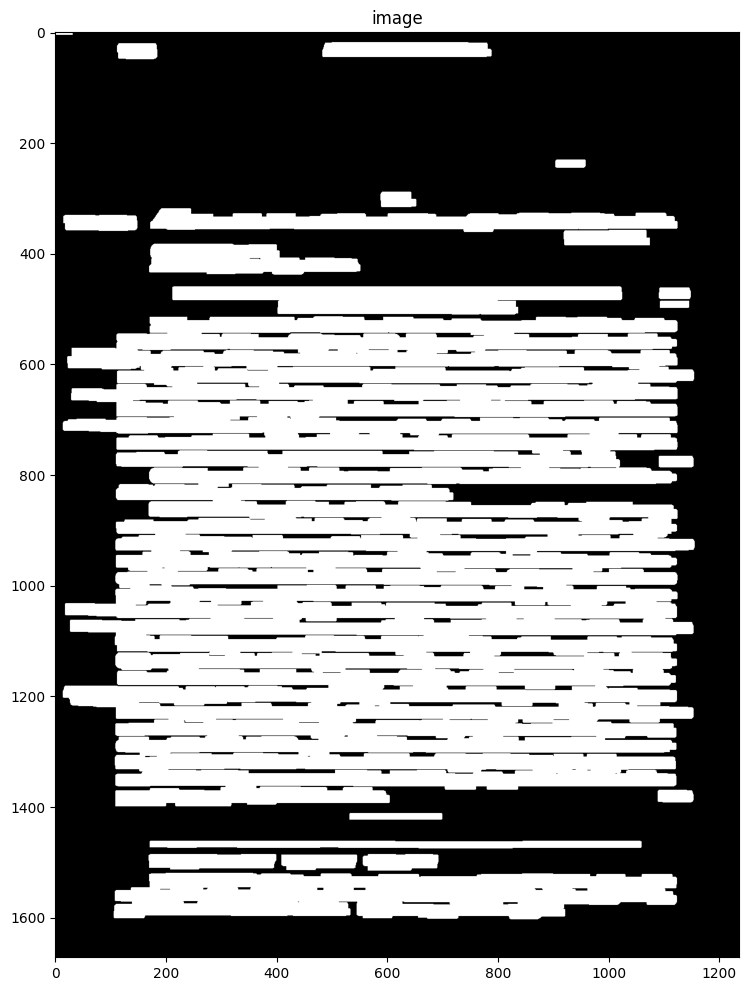

In [22]:
display_image(dilate)

In [23]:
cnts = cv2.findContours(dilate, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
cnts = sorted(cnts, key=lambda x: cv2.boundingRect(x)[1])

In [24]:
for c in cnts:
    x, y, w, h = cv2.boundingRect(c)
    if h < 20 and w > 250:
        roi = base_image[0:y+h, 0:x+im_w]
        cv2.rectangle(image, (x,y), (x+w, y+h), (36, 255, 12), 2)
cv2.imwrite("temp/sample_boxes2.png", roi)

True

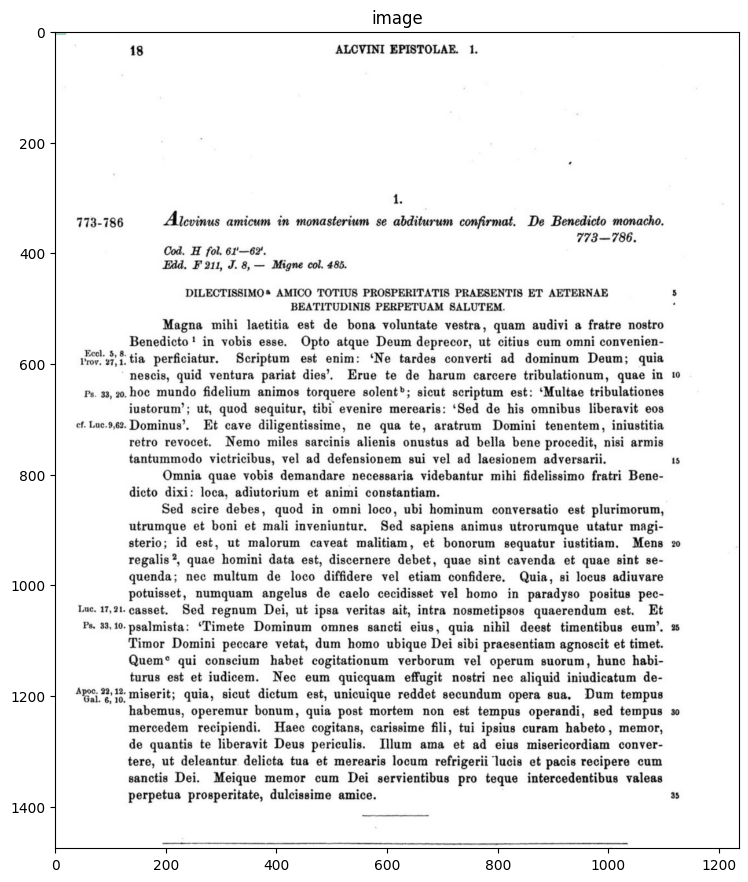

In [29]:
display_image(roi)
#display_image(image)

In [26]:
ocr_original_image = pytesseract.image_to_string(base_image)
print(ocr_original_image)

18 ALCVINI EPISTOLAE. 1.

1.

773-786 Alevinus amicum in monasterium se abditurum confirmat. De Benedicto monacho.
773—786.
Cod. H fol. 61'—62'.
Edd. F211, J. 8, — Migne col. 485.

DILECTISSIMO* AMICO TOTIUS PROSPERITATIS PRAESENTIS ET AETERNAE
BEATITUDINIS PERPETUAM SALUTEM.

Magna mihi laetitia est de bona voluntate vestra, quam audivi a fratre nostro

Benedicto! in vobis esse. Opto atque Deum deprecor, ut citius cum omni convenien-

Port tia perficiatur. Scriptum est enim: ‘Ne tardes converti ad dominum Deum; quia
nescis, quid ventura pariat dies’, Erue te de harum carcere tribulationum, quae in

Ps. 33, 20.hoe mundo fidelium animos torquere solent®; sicut scriptum est: ‘Multae tribulationes
iustorum’; ut, quod sequitur, tibi evenire merearis: ‘Sed de his omnibus liberavit eos

cf. Luc.9,62. Dominus’. Et cave diligentissime, ne qua te, aratrum Domini tenentem, iniustitia
retro revocet. Nemo miles sarcinis alienis onustus ad bella bene procedit, nisi armis
tantummodo victricibus, vel

In [27]:
ocr_processed_image = pytesseract.image_to_string(roi)
print(ocr_processed_image)

18 ALCVINI EPISTOLAE. 1.

1.

773-786 Alevinus amicum in monasterium se abditurum confirmat. De Benedicto monacho.

773—786.
Cod. H fol. 61'—62'.
Edd. F 211, J. 8, — Migne col. 485.

DILECTISSIMO* AMICO TOTIUS PROSPERITATIS PRAESENTIS ET AETERNAE
BEATITUDINIS PERPETUAM SALUTEM.

Magna mihi laetitia est de bona voluntate vestra, quam audivi a fratre nostro

Benedicto! in vobis esse. Opto atque Deum deprecor, ut citius cum omni convenien-

Port tia perficiatur. Scriptum est enim: ‘Ne tardes converti ad dominum Deum; quia
nescis, quid ventura pariat dies’, Erue te de harum carcere tribulationum, quae in

Ps. 33, 20.hoe mundo fidelium animos torquere solent®; sicut scriptum est: ‘Multae tribulationes
iustorum’; ut, quod sequitur, tibi evenire merearis: ‘Sed de his omnibus liberavit eos

cf. Luc.9,62. Dominus’. Et cave diligentissime, ne qua te, aratrum Domini tenentem, iniustitia
retro revocet. Nemo miles sarcinis alienis onustus ad bella bene procedit, nisi armis
tantummodo victricibus, v